In [1]:
import sys
import os
import random
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.abspath(os.path.join("..", "src")))
from processing import read_and_split, clean_text, tokenize, extract_correct_words, remove_stop_words, stem_words, create_dictionary

In [2]:
X_train, y_train, X_test, y_test = read_and_split('../data/tweets.csv')

# Target classes distribution

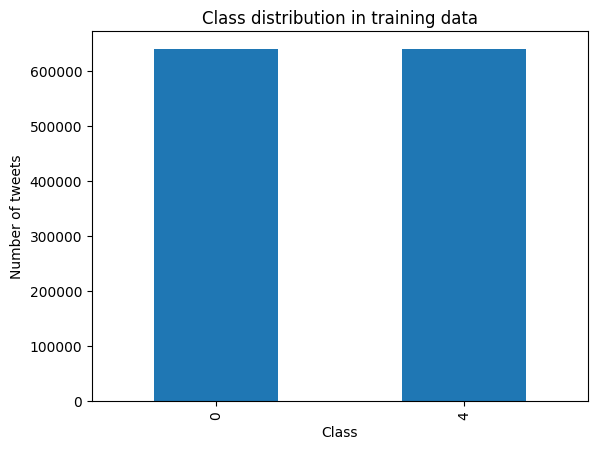

In [3]:
# create plot of class distribution
fig, ax = plt.subplots()
y_train.value_counts().plot(kind='bar', ax=ax)
ax.set_title('Class distribution in training data')
ax.set_xlabel('Class')
ax.set_ylabel('Number of tweets')
plt.show()

Both classes are equally represented in the dataset.

# Processing

## Text cleaning
This will include transforming text to lowercase, replacing emojis, removing mentions, hashtags and URLs, and replacing multiple spaces with a single space.

In [5]:
example_tweet = X_train.iloc[random.randint(0, len(X_train) - 1)]['text']
after_processing = clean_text(example_tweet)

print(f'Before: {example_tweet} \nAfter: {after_processing}')

Before: @newld let's go to baguio before the year ends! i love their cooool weather.  
After:  let's go to baguio before the year ends! i love their cooool weather. 


## Tokenization

Tokenization is the process of splitting text into individual words or tokens. After tokenization we extract tokens that consist only of only alphabetic characters.

In [ ]:
#nltk.download('punkt')

In [6]:
after_tokenization = tokenize(after_processing)
words_extracted = extract_correct_words(after_tokenization)
print(f'Before: {after_processing} \nAfter: {words_extracted}')

Before:  let's go to baguio before the year ends! i love their cooool weather.  
After: ['let', 'is', 'go', 'to', 'baguio', 'before', 'the', 'year', 'ends', 'i', 'love', 'their', 'cool', 'weather']


## Removing stop words

Stop words are considered to have little semantic value because they are so frequent and do not contribute significantly to the meaning or the structure of the text. Examples of stop words in English include "the" "is" "in" "and" "a" "an" and "of."

Removing stop words can help reduce the dimensionality of the data and improve the performance the model by focusing on the more meaningful words that are more likely to carry important information.

In [ ]:
#nltk.download('stopwords')

In [7]:
after_filtration = remove_stop_words(words_extracted)
print(f'Before: {words_extracted} \nAfter: {after_filtration}')

Before: ['let', 'is', 'go', 'to', 'baguio', 'before', 'the', 'year', 'ends', 'i', 'love', 'their', 'cool', 'weather'] 
After: ['let', 'go', 'baguio', 'year', 'ends', 'love', 'cool', 'weather']


## Stemming

Stemming is a text preprocessing technique used in natural language processing (NLP) to reduce words to their base or root form. It involves removing suffixes from words to obtain the stem, which may not always be a valid word itself. The purpose of stemming is to normalize words and reduce them to a common form, so that variations of the same word can be treated as the same word during analysis.

Lemmatization is a similar process with its advantages, but it comes at the price of being more resource-consuming. Hence, for our real-time use case, we choose the stemming algorithm.

In [8]:
after_stemming = stem_words(after_filtration)
print(f'Before: {after_filtration} \nAfter: {after_stemming}')

Before: ['let', 'go', 'baguio', 'year', 'ends', 'love', 'cool', 'weather'] 
After: ['let', 'go', 'baguio', 'year', 'end', 'love', 'cool', 'weather']


# Creating dictionary of words

In [11]:
words_dict = create_dictionary(X_train['text'][:30000])

In [12]:
dict(sorted(words_dict.items(), key=lambda item: item[1], reverse=True))

{'go': 2630,
 "'m": 2449,
 'get': 2077,
 'day': 1968,
 'good': 1710,
 'work': 1642,
 'love': 1576,
 'like': 1460,
 'quot': 1365,
 'got': 1353,
 'today': 1334,
 'time': 1311,
 'back': 1129,
 'thank': 1094,
 'lol': 1092,
 'miss': 1066,
 'one': 1054,
 'u': 1052,
 'want': 1033,
 'know': 1016,
 'feel': 999,
 'realli': 994,
 'im': 947,
 'see': 930,
 'think': 902,
 'amp': 896,
 'hope': 869,
 'na': 836,
 'home': 824,
 'still': 818,
 'watch': 811,
 'night': 802,
 'well': 798,
 'make': 794,
 'need': 793,
 'new': 780,
 'come': 746,
 'oh': 737,
 'look': 687,
 'last': 666,
 'much': 663,
 'twitter': 662,
 'tomorrow': 661,
 'wish': 656,
 'morn': 632,
 'haha': 602,
 'great': 602,
 'sleep': 599,
 "'re": 598,
 'sad': 589,
 'bad': 581,
 'wait': 565,
 'would': 553,
 'tri': 547,
 'week': 544,
 'fun': 541,
 'right': 524,
 'nice': 511,
 'thing': 507,
 'sorri': 497,
 'could': 490,
 'happi': 489,
 'follow': 483,
 'say': 482,
 'gon': 480,
 "'ve": 475,
 'friend': 475,
 'take': 474,
 'better': 468,
 'though': 453

In [16]:
vocabulary = set(words_dict.keys())

In [22]:
# TODO FIX this

In [21]:
from processing import process_tweet

process_tweet('best-selling')

[]

# Converting to feature vectors

## Bag of Words

Bag of Words is a text representation technique used in natural language processing. It involves creating a vocabulary of unique words from a corpus of text documents and representing each document as a vector of word frequencies. In the Bag of Words model, the order and structure of the words are disregarded, and only the occurrence of words is considered.